### Importing Our Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.__version__
sns.set(style='whitegrid', context='talk', palette=['#62C370', '#FFD166', '#EF476F'])
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Reading in Our Dataset and Doing an Initial Inspection or Two:

In [2]:
twitter_df = pd.read_csv(r"C:\Users\KSpicer\Documents\GitHub\machine_learning_projects\machine_learning_projects\regression_on_twitter_and_toms_hardware\Twitter\Twitter.csv")

In [3]:
twitter_df.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,predicted_value
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


In [4]:
twitter_df.columns

Index(['NCD_0', 'NCD_1', 'NCD_2', 'NCD_3', 'NCD_4', 'NCD_5', 'NCD_6', 'AI_0',
       'AI_1', 'AI_2', 'AI_3', 'AI_4', 'AI_5', 'AI_6', 'AS(NA)_0', 'AS(NA)_1',
       'AS(NA)_2', 'AS(NA)_3', 'AS(NA)_4', 'AS(NA)_5', 'AS(NA)_6', 'BL_0',
       'BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6', 'NAC_0', 'NAC_1',
       'NAC_2', 'NAC_3', 'NAC_4', 'NAC_5', 'NAC_6', 'AS(NAC)_0', 'AS(NAC)_1',
       'AS(NAC)_2', 'AS(NAC)_3', 'AS(NAC)_4', 'AS(NAC)_5', ' AS(NAC)_6',
       'CS_0', 'CS_1', 'CS_2', 'CS_3', 'CS_4', ' CS_5', ' CS_6', 'AT_0',
       'AT_1', 'AT_2', 'AT_3', 'AT_4', 'AT_5', 'AT_6', 'NA_0', 'NA_1', 'NA_2',
       'NA_3', 'NA_4', 'NA_5', 'NA_6', 'ADL_0', 'ADL_1', 'ADL_2', 'ADL_3',
       'ADL_4', 'ADL_5', 'ADL_6', 'NAD_0', 'NAD_1', 'NAD_2', 'NAD_3', 'NAD_4',
       'NAD_5', 'NAD_6', 'predicted_value'],
      dtype='object')

<AxesSubplot: >

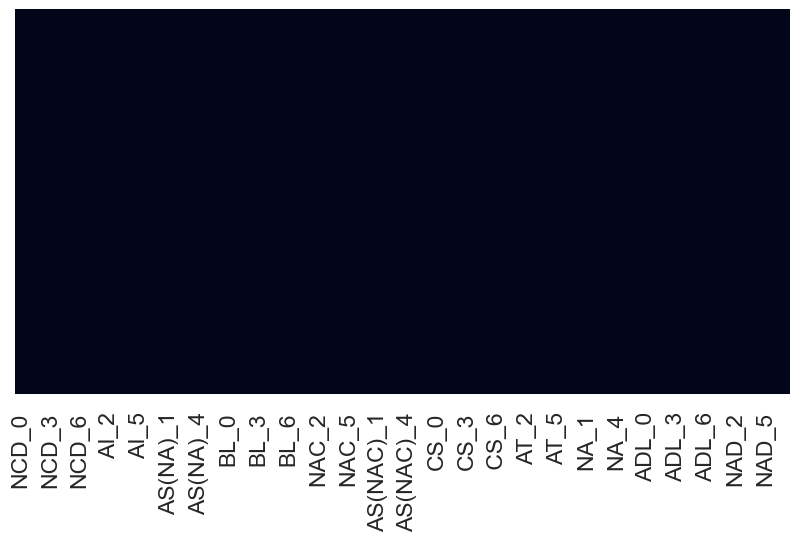

In [5]:
# There are all kinds of ways to check a dataframe for missing/null/NaNvalues, this time I figured we'd add a visial element to this standard part of the EDA process:

plt.figure(figsize=(10, 5))
sns.heatmap(twitter_df.isnull(), yticklabels=False, cbar=False)

### Having a Look at Correlated Attributes:

<AxesSubplot: >

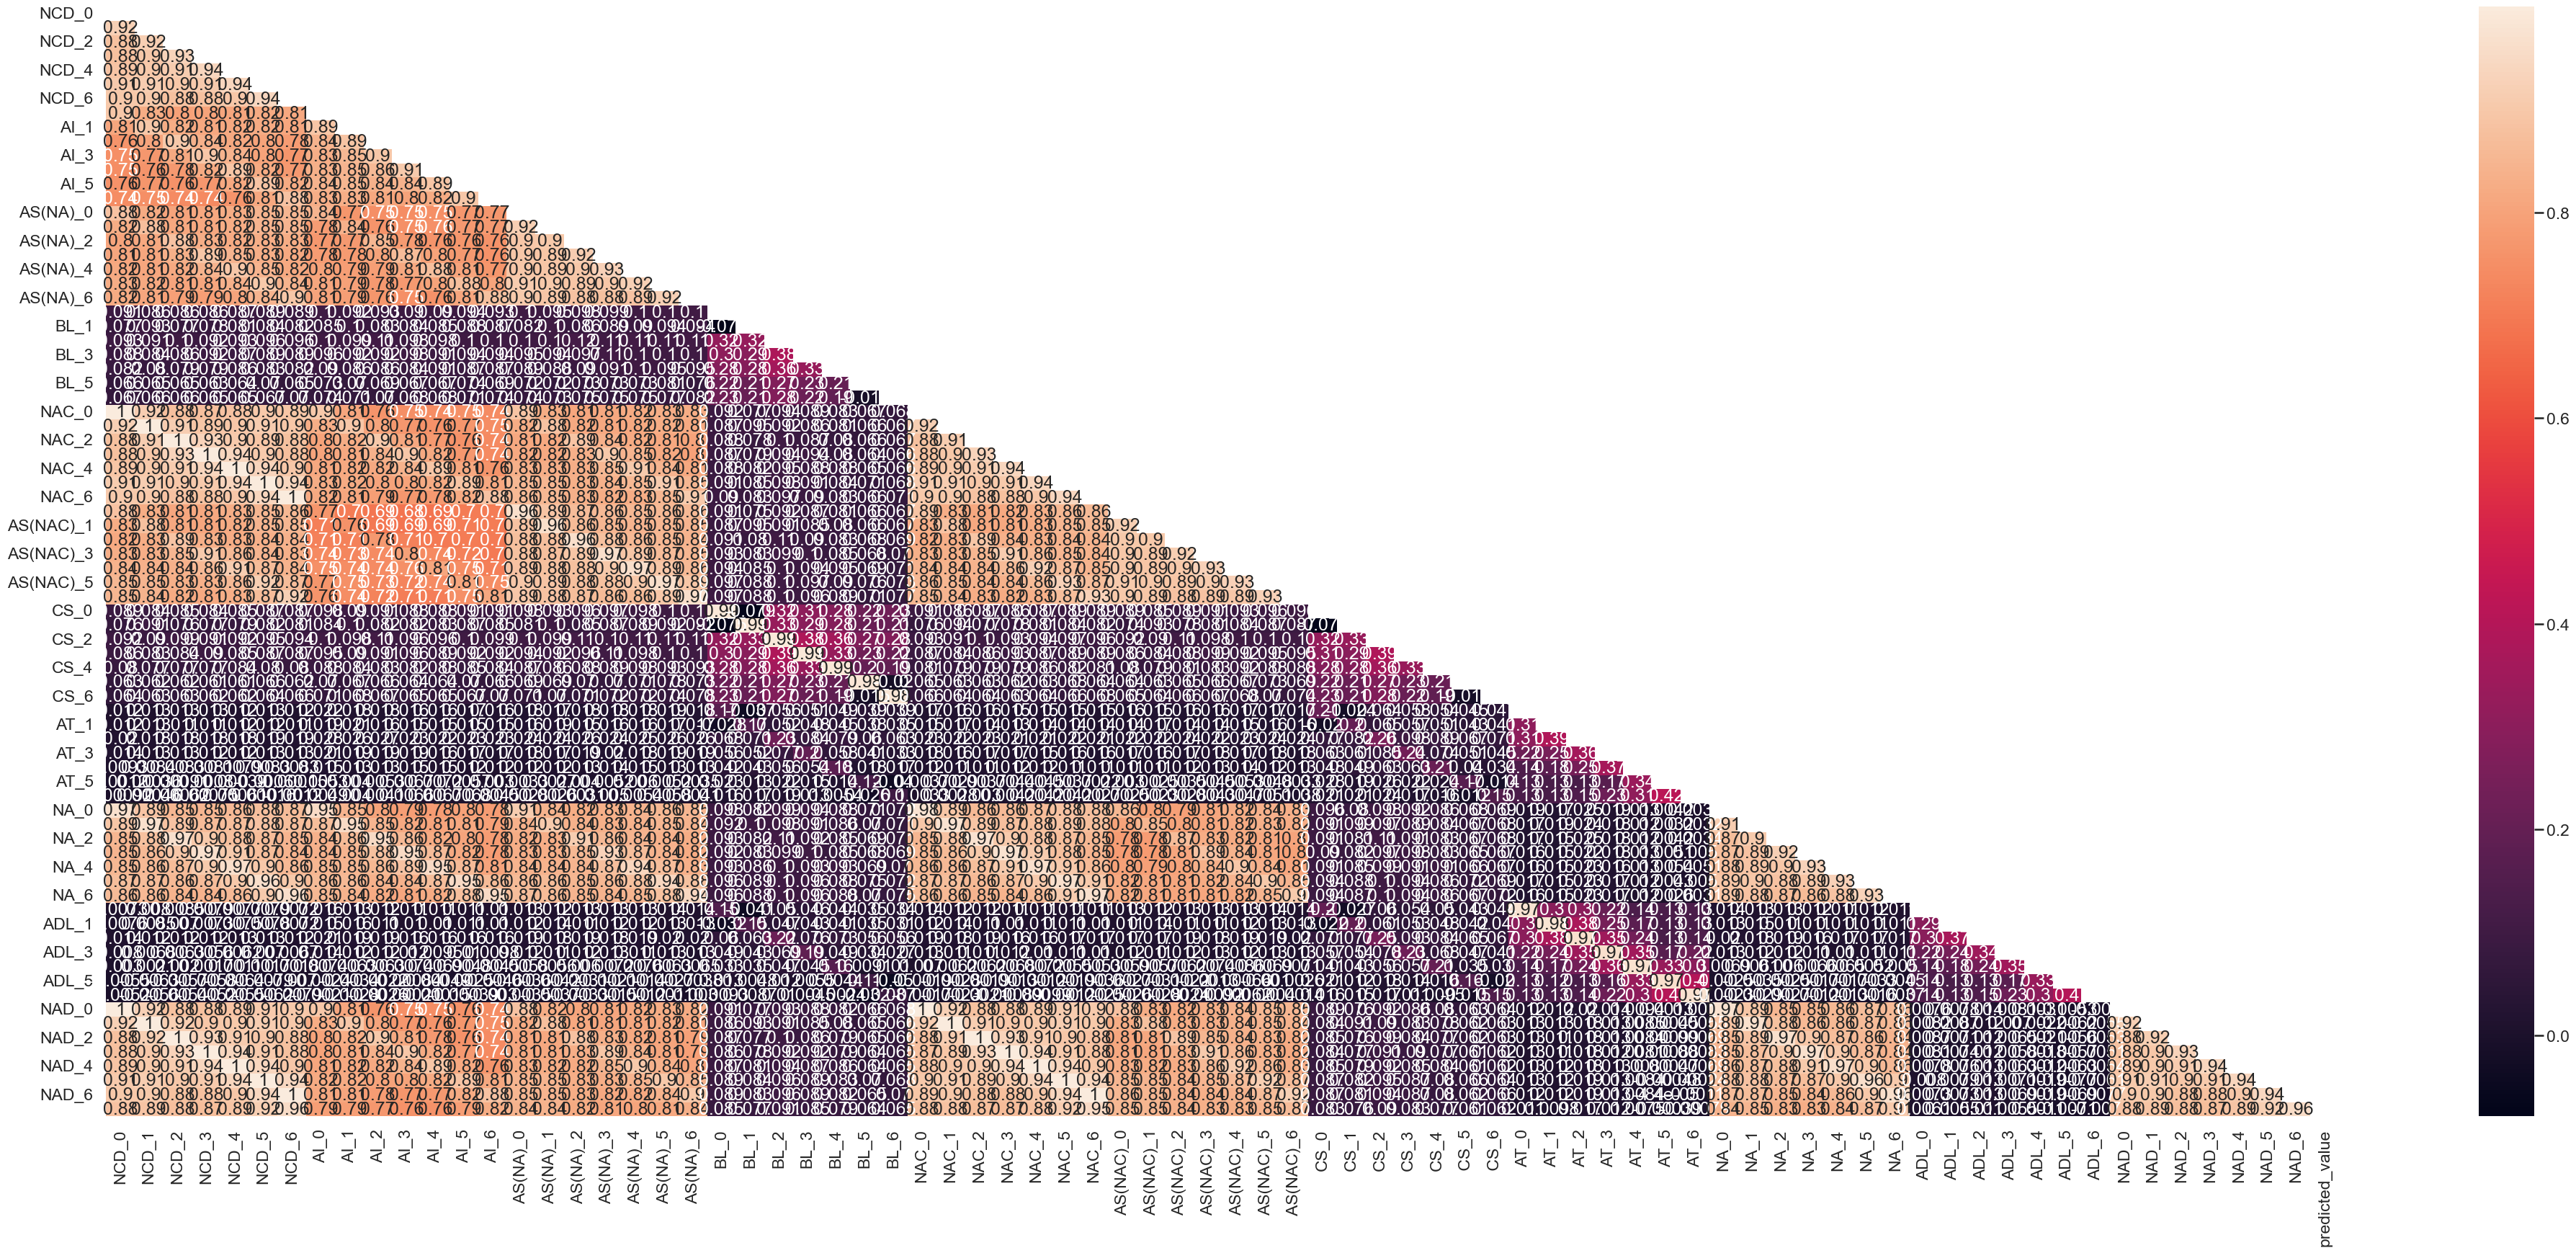

In [6]:
plt.figure(figsize=(50, 20))
corr_matrix = twitter_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True)

(78, 78)
(78, 78)


<AxesSubplot: >

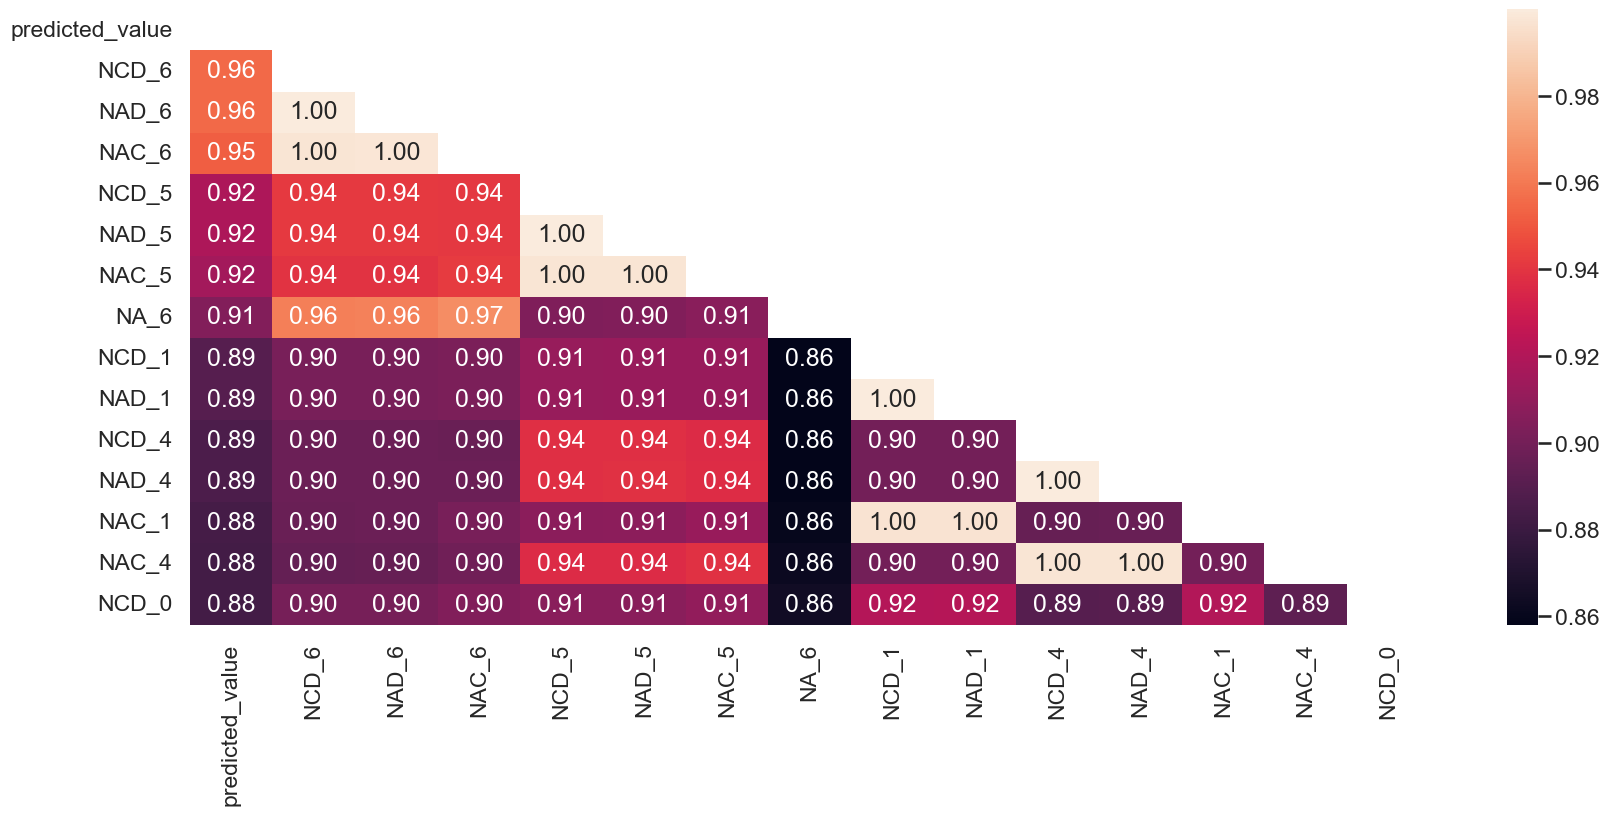

In [7]:
# With 77 different columns, visualizing this is a bit much, so what if we wanted to look at some of the most highly correlated attributes ...?

plt.figure(figsize=(20, 8))
n = 15
corr_matrix = twitter_df.corr()
print(corr_matrix.shape)
print(mask.shape)
cols = corr_matrix.nlargest(n, 'predicted_value')['predicted_value'].index
strong_corr_matrix = twitter_df[cols].corr()
mask = np.triu(np.ones_like(strong_corr_matrix, dtype=bool))
sns.heatmap(strong_corr_matrix, mask=mask, annot=True, fmt='.2f')

### Trying A Linear Regression Model Using these Attributes to Predict the "Buzz" of a Discussion/Topic:

In [8]:
# Load the data and select the columns
n = 15
corr_matrix = twitter_df.corr().values
cols = twitter_df.columns[np.argsort(-corr_matrix[0])[1:n+1]]

# Split the data into features and target
X = twitter_df[cols]
y = twitter_df['predicted_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test set
score = model.score(X_test, y_test)
print("R-squared score:", score)

R-squared score: 0.9269015582231186


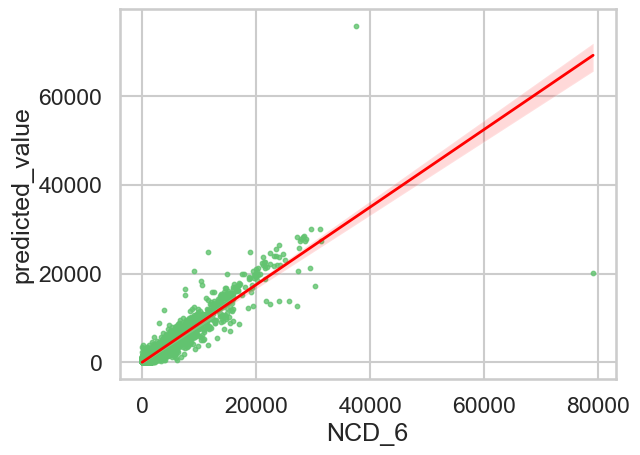

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data and select the columns
n = 15
corr_matrix = twitter_df.corr().values
cols = twitter_df.columns[np.argsort(-corr_matrix[0])[1:n+1]]

# Split the data into features and target
X = twitter_df[cols]
y = twitter_df['predicted_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Create a scatter plot with a regression line
sns.regplot(x=X_train.iloc[:, 11], y=y_train, scatter_kws={'s': 10}, line_kws={'color': 'red', 'linewidth': 2})
plt.xlabel(cols[11])
plt.ylabel('predicted_value')
plt.show()

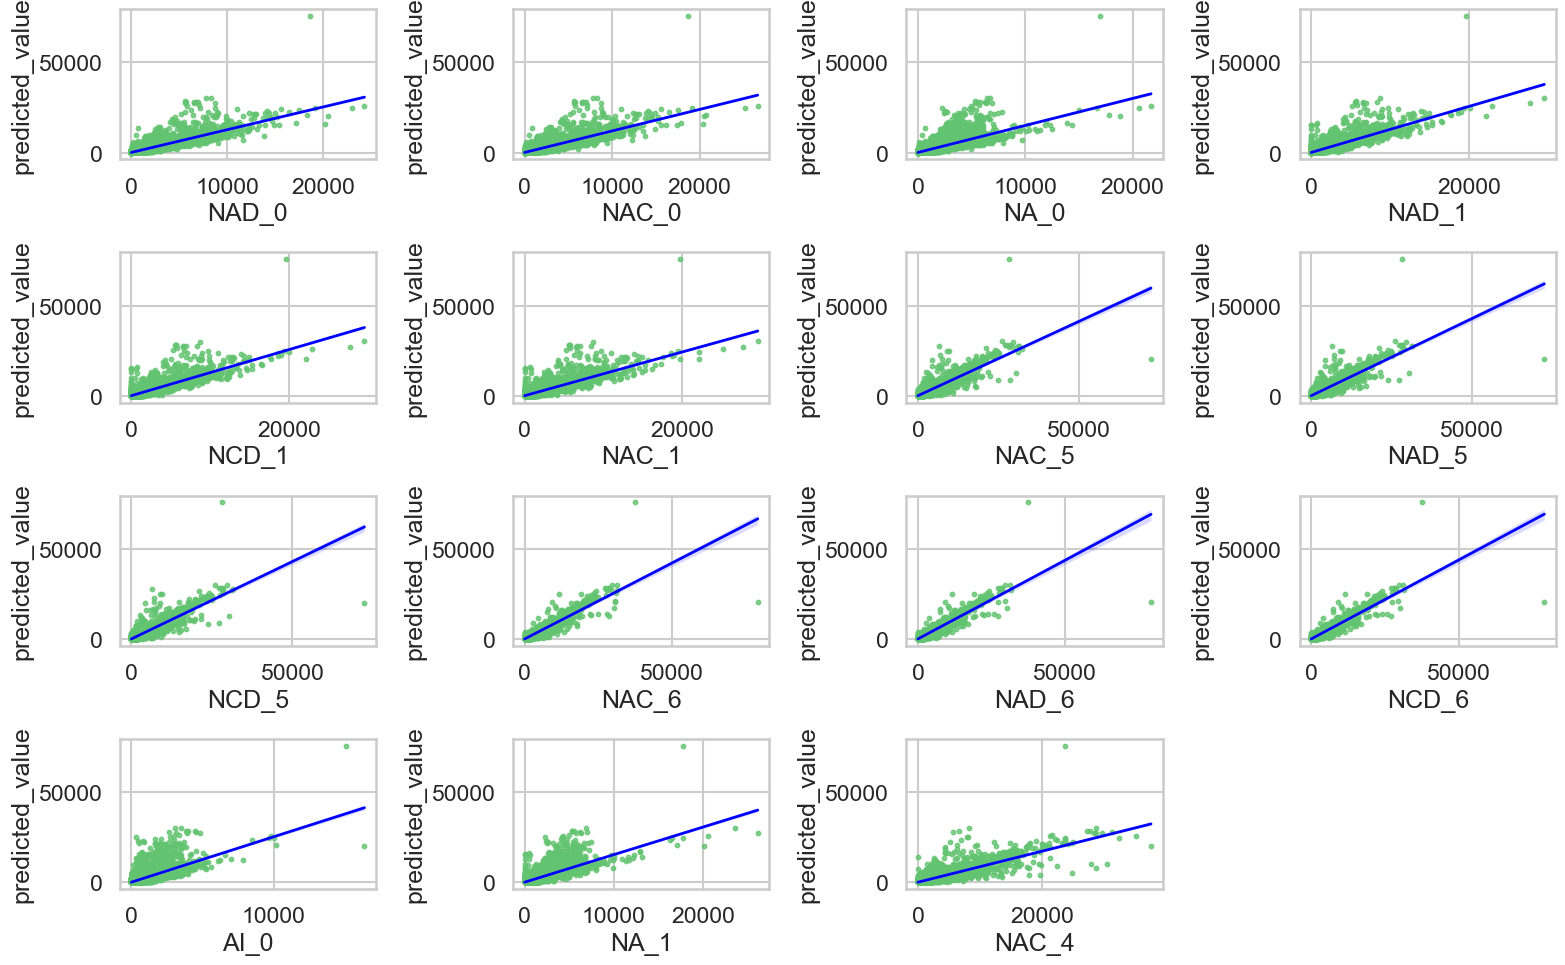

In [16]:
# Create a grid of subplots
n_cols = 4
n_rows = int(np.ceil(len(X_train.columns) / n_cols))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 10))
axes = axes.flatten()

# Plot each column in its own subplot
for i, column in enumerate(X_train.columns):
    sns.regplot(x=X_train[column], y=y_train, scatter_kws={'s': 10}, line_kws={'color': 'blue', 'linewidth': 2}, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('predicted_value')

# Hide the empty subplots
for i in range(len(X_train.columns), n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust the layout and display the plot
fig.tight_layout()
plt.show()